<a href="https://colab.research.google.com/github/vardhanreddy-t/Neural_ICP5/blob/main/ICP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Original Model
original_model = Sequential()
original_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
original_model.add(Dropout(0.2))
original_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
original_model.add(MaxPooling2D(pool_size=(2, 2)))
original_model.add(Flatten())
original_model.add(Dense(512, activation='relu'))
original_model.add(Dropout(0.5))
original_model.add(Dense(num_classes, activation='softmax'))

# Compile original model
original_epochs = 5
original_lrate = 0.01
original_decay = original_lrate / original_epochs
sgd = SGD(learning_rate=original_lrate, momentum=0.9, decay=original_decay, nesterov=False)
original_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit original model
original_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=original_epochs, batch_size=32)
# Evaluate original model
original_scores = original_model.evaluate(X_test, y_test, verbose=0)
original_accuracy = original_scores[1] * 100
print("Original Model Accuracy: %.2f%%" % original_accuracy)

# Modified Model
modified_model = Sequential()
modified_model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
modified_model.add(Dropout(0.2))
modified_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
modified_model.add(MaxPooling2D(pool_size=(2, 2)))
modified_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modified_model.add(Dropout(0.2))
modified_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
modified_model.add(MaxPooling2D(pool_size=(2, 2)))
modified_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modified_model.add(Dropout(0.2))
modified_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
modified_model.add(MaxPooling2D(pool_size=(2, 2)))
modified_model.add(Flatten())
modified_model.add(Dropout(0.2))
modified_model.add(Dense(1024, activation='relu'))
modified_model.add(Dropout(0.2))
modified_model.add(Dense(512, activation='relu'))
modified_model.add(Dropout(0.2))
modified_model.add(Dense(num_classes, activation='softmax'))

# Compile modified model
modified_epochs = 100
modified_lrate = 0.01
modified_decay = modified_lrate / modified_epochs
sgd = SGD(learning_rate=modified_lrate, momentum=0.9, decay=modified_decay, nesterov=False)
modified_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit modified model
modified_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=modified_epochs, batch_size=32)
# Evaluate modified model
modified_scores = modified_model.evaluate(X_test, y_test, verbose=0)
modified_accuracy = modified_scores[1] * 100
print("Modified Model Accuracy: %.2f%%" % modified_accuracy)

# Compare performances
performance_change = modified_accuracy - original_accuracy
print("Performance Change: %.2f%%" % performance_change)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.3009 - loss: 1.9049 - val_accuracy: 0.4877 - val_loss: 1.3835
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5054 - loss: 1.3764 - val_accuracy: 0.5639 - val_loss: 1.2447
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5801 - loss: 1.1838 - val_accuracy: 0.6157 - val_loss: 1.1195
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6291 - loss: 1.0353 - val_accuracy: 0.6431 - val_loss: 1.0194
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6794 - loss: 0.9108 - val_accuracy: 0.6390 - val_loss: 1.0381
Original Model Accuracy: 63.90%
Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.2392 - loss: 2.0382 - val_accuracy: 0.4485 - val_loss: 1.4921
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4633 - loss: 1.4729 - val_accuracy: 0.5508 - val_loss: 1.2645
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Classes: [3 8 0 0]
Actual Classes: [3 8 8 0]


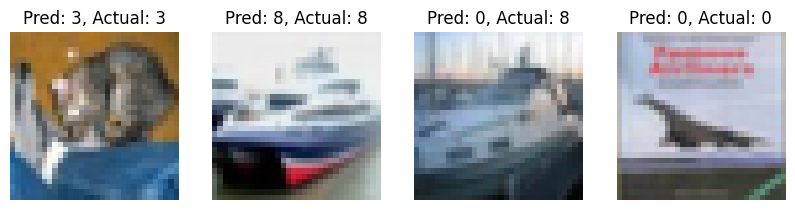

In [4]:
import matplotlib.pyplot as plt

# ... [previous model training code] ...

# Predict the first 4 images of the test data
predictions = modified_model.predict(X_test[:4])
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = np.argmax(y_test[:4], axis=1)

# Display predictions and actual classes
print("Predicted Classes:", predicted_classes)
print("Actual Classes:", actual_classes)

# Visualize the first 4 images with their predictions
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i])
    plt.title(f'Pred: {predicted_classes[i]}, Actual: {actual_classes[i]}')
    plt.axis('off')
plt.show()


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4497 - loss: 1.6263 - val_accuracy: 0.4881 - val_loss: 1.5000
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4261 - loss: 1.6684 - val_accuracy: 0.3980 - val_loss: 1.6999
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4420 - loss: 1.6183 - val_accuracy: 0.4265 - val_loss: 1.6563
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2713 - loss: 2.0060 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0970 - loss: 2.3043 - val_accuracy: 0.0999 - val_loss: 2.3021
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.1001 - loss: 2.3022 - val_accuracy: 0.1023 - val_loss: 2.2982
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1587 - loss: 2.1987 - val_accuracy: 0.2428 - val_loss: 2.0906
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.3188 - l

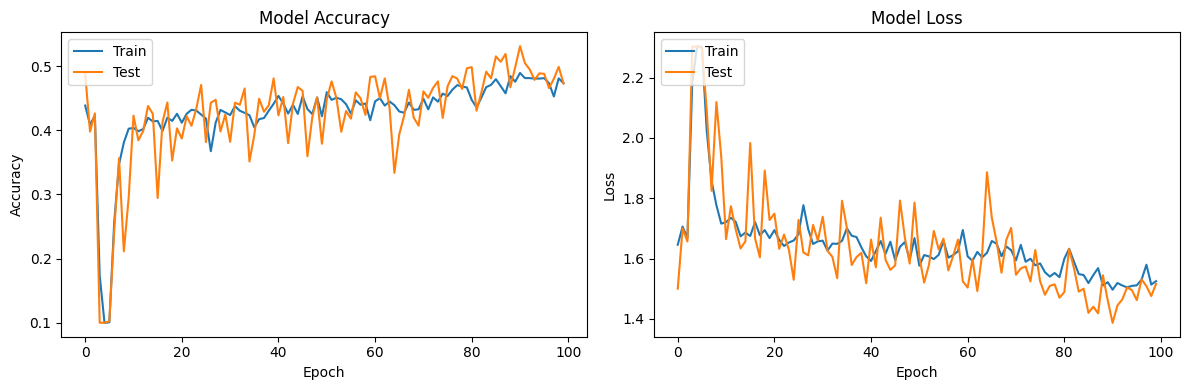

In [3]:
# Fit modified model and store the history
history = modified_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=modified_epochs, batch_size=32)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()
